In [5]:
# Data manipulation and analysis
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Date and time utilities
import datetime as dt

# Machine learning helpers
from sklearn.preprocessing import StandardScaler

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.4f}'.format)

In [8]:
train = pd.read_csv('/kaggle/input/hull-tactical-market-prediction/train.csv')
test = pd.read_csv('/kaggle/input/hull-tactical-market-prediction/test.csv')

print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")

train.head(5)

Train shape: (8990, 98)
Test shape: (10, 99)


,date_id,D1,D2,D3,D4,D5,D6,D7,D8,D9,E1,E10,E11,E12,E13,E14,E15,E16,E17,E18,E19,E2,E20,E3,E4,E5,E6,E7,E8,E9,I1,I2,I3,I4,I5,I6,I7,I8,I9,M1,M10,M11,M12,M13,M14,M15,M16,M17,M18,M2,M3,M4,M5,M6,M7,M8,M9,P1,P10,P11,P12,P13,P2,P3,P4,P5,P6,P7,P8,P9,S1,S10,S11,S12,S2,S3,S4,S5,S6,S7,S8,S9,V1,V10,V11,V12,V13,V2,V3,V4,V5,V6,V7,V8,V9,forward_returns,risk_free_rate,market_forward_excess_returns
0,0,0,0,0,1,1,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.0024,0.0003,-0.0030
1,1,0,0,0,1,1,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.0085,0.0003,-0.0091
2,2,0,0,0,1,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.0096,0.0003,-0.0102
3,3,0,0,0,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0047,0.0003,0.0040
4,4,0,0,0,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.0117,0.0003,-0.0123


# **Data overview**

In [10]:
train.info()
train.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8990 entries, 0 to 8989
Data columns (total 98 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date_id                        8990 non-null   int64  
 1   D1                             8990 non-null   int64  
 2   D2                             8990 non-null   int64  
 3   D3                             8990 non-null   int64  
 4   D4                             8990 non-null   int64  
 5   D5                             8990 non-null   int64  
 6   D6                             8990 non-null   int64  
 7   D7                             8990 non-null   int64  
 8   D8                             8990 non-null   int64  
 9   D9                             8990 non-null   int64  
 10  E1                             7206 non-null   float64
 11  E10                            7984 non-null   float64
 12  E11                            7984 non-null   f

,count,mean,std,min,25%,50%,75%,max
date_id,8990.0000,4494.5000,2595.3338,0.0000,2247.2500,4494.5000,6741.7500,8989.0000
D1,8990.0000,0.0316,0.1749,0.0000,0.0000,0.0000,0.0000,1.0000
D2,8990.0000,0.0316,0.1749,0.0000,0.0000,0.0000,0.0000,1.0000
D3,8990.0000,0.0478,0.2134,0.0000,0.0000,0.0000,0.0000,1.0000
D4,8990.0000,0.5752,0.4943,0.0000,0.0000,1.0000,1.0000,1.0000
...,...,...,...,...,...,...,...,...
V8,7984.0000,0.3039,0.3511,0.0007,0.0007,0.1010,0.5900,1.0000
V9,4451.0000,0.1292,1.2773,-1.4974,-0.7382,-0.1708,0.6859,12.9975
forward_returns,8990.0000,0.0005,0.0106,-0.0398,-0.0043,0.0007,0.0059,0.0407
risk_free_rate,8990.0000,0.0001,0.0001,-0.0000,0.0000,0.0001,0.0002,0.0003


<Axes: xlabel='market_forward_excess_returns', ylabel='Density'>

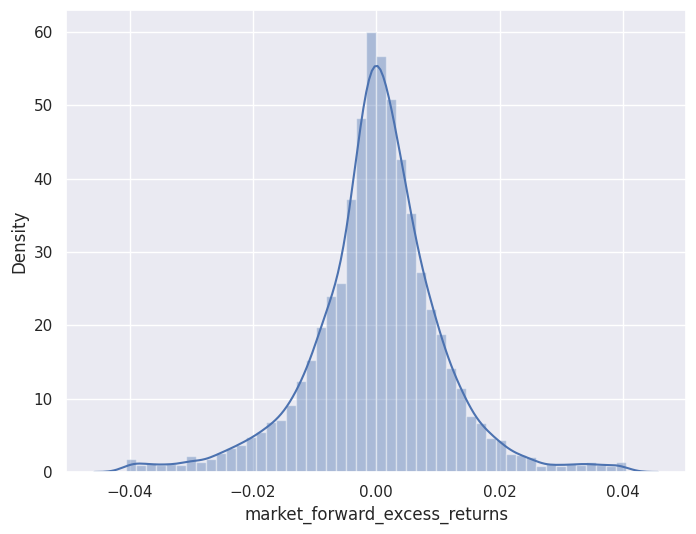

In [72]:
f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(train['market_forward_excess_returns'])

# **Target owerview**

In [20]:
train['market_forward_excess_returns'].describe()

count   8990.0000
mean       0.0001
std        0.0106
min       -0.0406
25%       -0.0048
50%        0.0003
75%        0.0055
max        0.0406
Name: market_forward_excess_returns, dtype: float64

# **Check missing values**

In [73]:
train.isnull().sum().sort_values(ascending=False).head(20)

E7     6969
V10    6049
S3     5733
M1     5547
M13    5540
M14    5540
M6     5043
V9     4539
S12    3537
M5     3283
M2     3217
S8     3009
M3     2018
E1     1784
P6     1638
E20    1616
P7     1616
P5     1574
V5     1512
S5     1511
dtype: int64

Text(0.5, 1.0, 'Missing values  (%)')

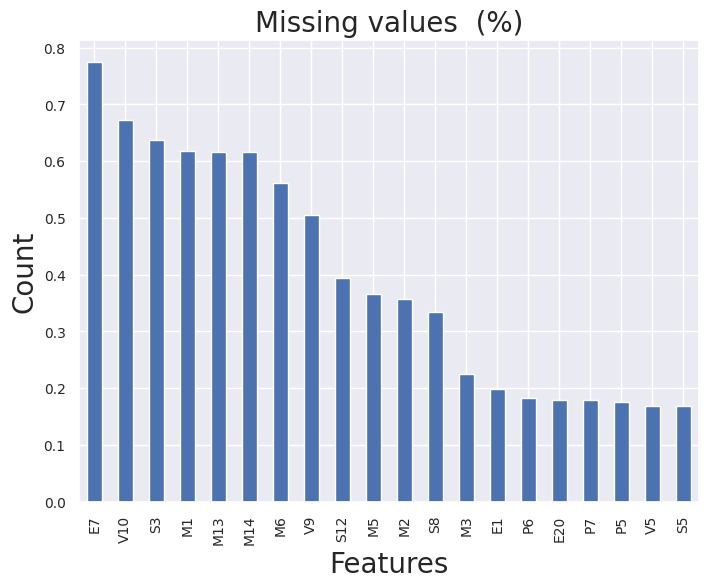

In [71]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum() / train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

percent_data = percent.head(20)
percent_data.plot(kind="bar", figsize = (8,6), fontsize = 10)
plt.xlabel("Features", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Missing values  (%)", fontsize = 20)

In [8]:
# Autoencoder imputation (single combined cell)
# Paste this after the missing-values/EDA cell so `train` exists in kernel.
# Numeric-only autoencoder with masked loss, denoising, and saving imputed CSV.

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, backend as K

# --- Config (tweak as needed) ---
CSV = 'train.csv'            # fallback if `train` not present
use_existing_train = 'train' in globals()
numeric_only = True
test_size = 0.15
random_state = 42
epochs = 60
batch_size = 256
latent_dim = 64
denoise_prob = 0.12   # fraction of observed entries randomly masked during training
verbose = 1
output_csv = 'train_imputed_autoencoder.csv'

# --- Load / ensure DataFrame ---
if use_existing_train:
    df = globals()['train']
    print("Using DataFrame from variable `train` (in-memory).")
else:
    df = pd.read_csv(CSV)
    print(f"Loaded DataFrame from {CSV}")

# --- Select numeric features ---
if numeric_only:
    num_df = df.select_dtypes(include=['number']).copy()
else:
    num_df = df.copy()
cols = num_df.columns.tolist()
print(f'Initial numeric features: {len(cols)}')

# --- Drop problematic columns/rows to avoid zero-variance or all-missing issues ---
valid_cols = [c for c in num_df.columns if num_df[c].notna().any() and num_df[c].nunique(dropna=True) > 1]
if len(valid_cols) < len(cols):
    dropped = [c for c in cols if c not in valid_cols]
    print(f"Dropping {len(dropped)} numeric columns that are all-missing or constant: {dropped}")
    num_df = num_df[valid_cols].copy()
    cols = num_df.columns.tolist()
    print(f'After dropping: using {len(cols)} numeric features')

# Recompute mask and drop rows with no observed numeric features
mask = (~num_df.isna()).astype(float).values   # 1 observed, 0 missing
row_obs = mask.sum(axis=1) > 0
if not row_obs.all():
    n_drop = int(np.sum(~row_obs))
    print(f"Dropping {n_drop} rows with no observed numeric features")
    num_df = num_df.loc[row_obs].reset_index(drop=True)
    # also filter the original df so saved imputed DF aligns with inputs
    df = df.loc[row_obs].reset_index(drop=True)
    mask = mask[row_obs]

# column means and initial fill (after dropping cols/rows)
col_means = num_df.mean()
X_filled = num_df.fillna(col_means).values.astype(float)

# --- Scaling ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filled)

# --- Inputs for model: [scaled_values | mask]  and targets [scaled_values | mask] (mask used for loss)
X_input = np.concatenate([X_scaled, mask], axis=1)
Y_target = np.concatenate([X_scaled, mask], axis=1)

# --- Model definition ---
n_features = len(cols)
inp_dim = n_features * 2
inputs = keras.Input(shape=(inp_dim,))
x = layers.Dense(256, activation='relu')(inputs)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(latent_dim, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
outputs = layers.Dense(n_features, activation='linear')(x)
model = keras.Model(inputs, outputs)

# masked loss that averages only over observed features per-sample
def masked_mse(n_features):
    def loss(y_true, y_pred):
        target = y_true[:, :n_features]
        mask_part = y_true[:, n_features:]
        se = mask_part * K.square(y_pred - target)
        mask_sum = K.sum(mask_part, axis=-1)
        loss_per_sample = K.sum(se, axis=-1) / (mask_sum + K.epsilon())
        zero_mask = K.equal(mask_sum, 0)
        loss_per_sample = K.switch(zero_mask, K.zeros_like(loss_per_sample), loss_per_sample)
        return loss_per_sample
    return loss

model.compile(optimizer='adam', loss=masked_mse(n_features))
model.summary()

# --- Optional denoising generator ---
def batch_generator(X_in, Y_tgt, batch_size, denoise_prob):
    n = X_in.shape[0]
    idx = np.arange(n)
    while True:
        np.random.shuffle(idx)
        for i in range(0, n, batch_size):
            batch_idx = idx[i:i+batch_size]
            Xb = X_in[batch_idx].copy()
            Yb = Y_tgt[batch_idx].copy()
            if denoise_prob and denoise_prob > 0:
                vals = Xb[:, :n_features]
                masks = Xb[:, n_features:]
                random_mask = (np.random.rand(*vals.shape) < denoise_prob) & (masks == 1)
                vals[random_mask] = 0.0
                Xb[:, :n_features] = vals
            yield Xb, Yb

# --- Train/test split ---
X_train, X_val, Y_train, Y_val = train_test_split(X_input, Y_target, test_size=test_size, random_state=random_state)

# --- Callbacks ---
callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
]

# --- Fit (skip if history exists) ---
if 'history' in globals():
    print("Found existing 'history' in kernel — skipping training.")
else:
    if denoise_prob and denoise_prob > 0:
        steps_per_epoch = max(1, X_train.shape[0] // batch_size)
        history = model.fit(batch_generator(X_train, Y_train, batch_size, denoise_prob),
                            epochs=epochs,
                            steps_per_epoch=steps_per_epoch,
                            validation_data=(X_val, Y_val),
                            callbacks=callbacks,
                            verbose=verbose)
    else:
        history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
                            epochs=epochs, batch_size=batch_size, callbacks=callbacks, verbose=verbose)

# --- Impute: predict and replace missing entries ---
X_all = np.concatenate([X_scaled, mask], axis=1)
recon = model.predict(X_all, batch_size=1024)
imputed_scaled = X_scaled.copy()
missing_locs = (mask == 0)
imputed_scaled[missing_locs] = recon[missing_locs]
imputed_vals = scaler.inverse_transform(imputed_scaled)

# --- Build DataFrame and save ---
df_imputed = pd.DataFrame(imputed_vals, columns=cols)
# add back non-numeric columns unchanged
for c in df.columns:
    if c not in cols:
        df_imputed[c] = df[c].values
df_imputed.to_csv(output_csv, index=False)
print(f'Saved imputed CSV: {output_csv}')

# --- Quick evaluation: simulated masking RMSE ---
def simulate_rmse(original_num_df, model, scaler, frac_mask=0.05, trials=3, random_state=0):
    nm = (~original_num_df.isna()).astype(float).values
    filled = original_num_df.fillna(col_means).values.astype(float)
    scaled_full = scaler.transform(filled)
    rng = np.random.RandomState(random_state)
    rmses = []
    for t in range(trials):
        sim_mask = nm.copy()
        obs_positions = np.argwhere(sim_mask == 1)
        k = max(1, int(len(obs_positions) * frac_mask))
        hide_idx = rng.choice(len(obs_positions), size=k, replace=False)
        scaled_sim = scaled_full.copy()
        hid_mask = np.zeros_like(sim_mask, dtype=bool)
        for hi in hide_idx:
            r,c = obs_positions[hi]
            scaled_sim[r,c] = 0.0
            sim_mask[r,c] = 0
            hid_mask[r,c] = True
        Xsim = np.concatenate([scaled_sim, sim_mask], axis=1)
        recon_sim = model.predict(Xsim, batch_size=1024)
        se = (recon_sim - scaled_full)**2
        mse = se[hid_mask].mean() if hid_mask.any() else np.nan
        rmses.append(np.sqrt(mse) if not np.isnan(mse) else np.nan)
    return np.nanmean(rmses), np.nanstd(rmses)

rmse_mean, rmse_std = simulate_rmse(num_df, model, scaler, frac_mask=0.05, trials=3, random_state=1)
print('Simulated RMSE (scaled-space):', rmse_mean, '+/-', rmse_std)

# Print compact history if present
if 'history' in globals():
    try:
        h = history.history
        losses = h.get('loss', [])
        val_losses = h.get('val_loss', [])
        print('\nTraining epochs:', len(losses))
        for i, (l, vl) in enumerate(zip(losses, val_losses)):
            if i < 10:
                print(f'Epoch {i+1}: loss={l:.6f}, val_loss={vl:.6f}')
        print('Final train loss:', losses[-1] if losses else 'N/A')
        print('Final val loss:', val_losses[-1] if val_losses else 'N/A')
    except Exception:
        pass


Loaded DataFrame from train.csv
Initial numeric features: 98


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 196)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │        50,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 98)             │        25,186 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 158,114 (617.63 KB)

 Trainable params: 158,114 (617.63 KB)

 Non-trainable params: 0 (0.00 B)

Found existing 'history' in kernel — skipping training.
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Saved imputed CSV: train_imputed_autoencoder.csv
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Simulated RMSE (scaled-space): 1.1094769111133085 +/- 0.005573931568660915

Training epochs: 60
Epoch 1: loss=0.880296, val_loss=0.565192
Epoch 2: loss=0.462505, val_loss=0.352910
Epoch 3: loss=0.331650, val_loss=0.265555
Epoch 4: loss=0.271437, val_loss=0.215876
Epoch 5: loss=0.235785, val_loss=0.187848
Epoch 6: loss=0.213915, val_loss=0.171043
Epoch 7: loss=0.196351, val_loss=0.153950
Epoch 8: loss=0.182907, val_loss=0.139268
Epoch 9: loss=0.171549, val_loss=0.127612
Epoch 10: loss=0.161339, val_loss=0.120381
Final train loss: 0.0930822566151619
Final val loss: 0.049207158386707306


# **Correletion**

In [55]:
target = 'market_forward_excess_returns'
corr_target = train.corr()[target].sort_values(ascending=False)

# Топ 10 позитивно корельованих
print("Top 10 positive correlations:")
print(corr_target.head(10))

# Топ 10 негативно корельованих
print("\nTop 10 negative correlations:")
print(corr_target.tail(10))

Top 10 positive correlations:
market_forward_excess_returns   1.0000
forward_returns                 1.0000
V13                             0.0624
M1                              0.0463
S5                              0.0401
D2                              0.0342
D1                              0.0342
M2                              0.0333
V10                             0.0327
V7                              0.0315
Name: market_forward_excess_returns, dtype: float64

Top 10 negative correlations:
P12   -0.0229
P5    -0.0229
M12   -0.0245
I2    -0.0255
P8    -0.0297
E12   -0.0308
E11   -0.0320
E7    -0.0325
S2    -0.0377
M4    -0.0665
Name: market_forward_excess_returns, dtype: float64


In [49]:
groups = ['M', 'E', 'I', 'P', 'V', 'S', 'MOM', 'D']

for g in groups:
    cols = [c for c in train.columns if c.startswith(g)]
    corr_mean = train[cols].corrwith(train['market_forward_excess_returns']).mean()
    print(f"Average correlation of group {g} with target: {corr_mean:.4f}")

Average correlation of group M with target: 0.0017
Average correlation of group E with target: -0.0024
Average correlation of group I with target: -0.0023
Average correlation of group P with target: -0.0103
Average correlation of group V with target: 0.0132
Average correlation of group S with target: 0.0000
Average correlation of group MOM with target: nan
Average correlation of group D with target: 0.0179


In [48]:
target = 'market_forward_excess_returns'
corr_target = train.corr()[target].sort_values(ascending=False)
corr_abs = corr_target.abs().sort_values(ascending=False)

print("Top 15 features by absolute correlation with target:")
print(corr_abs.head(15))

Top 15 features by absolute correlation with target:
market_forward_excess_returns   1.0000
forward_returns                 1.0000
M4                              0.0665
V13                             0.0624
M1                              0.0463
S5                              0.0401
S2                              0.0377
D2                              0.0342
D1                              0.0342
M2                              0.0333
V10                             0.0327
E7                              0.0325
E11                             0.0320
V7                              0.0315
E12                             0.0308
Name: market_forward_excess_returns, dtype: float64


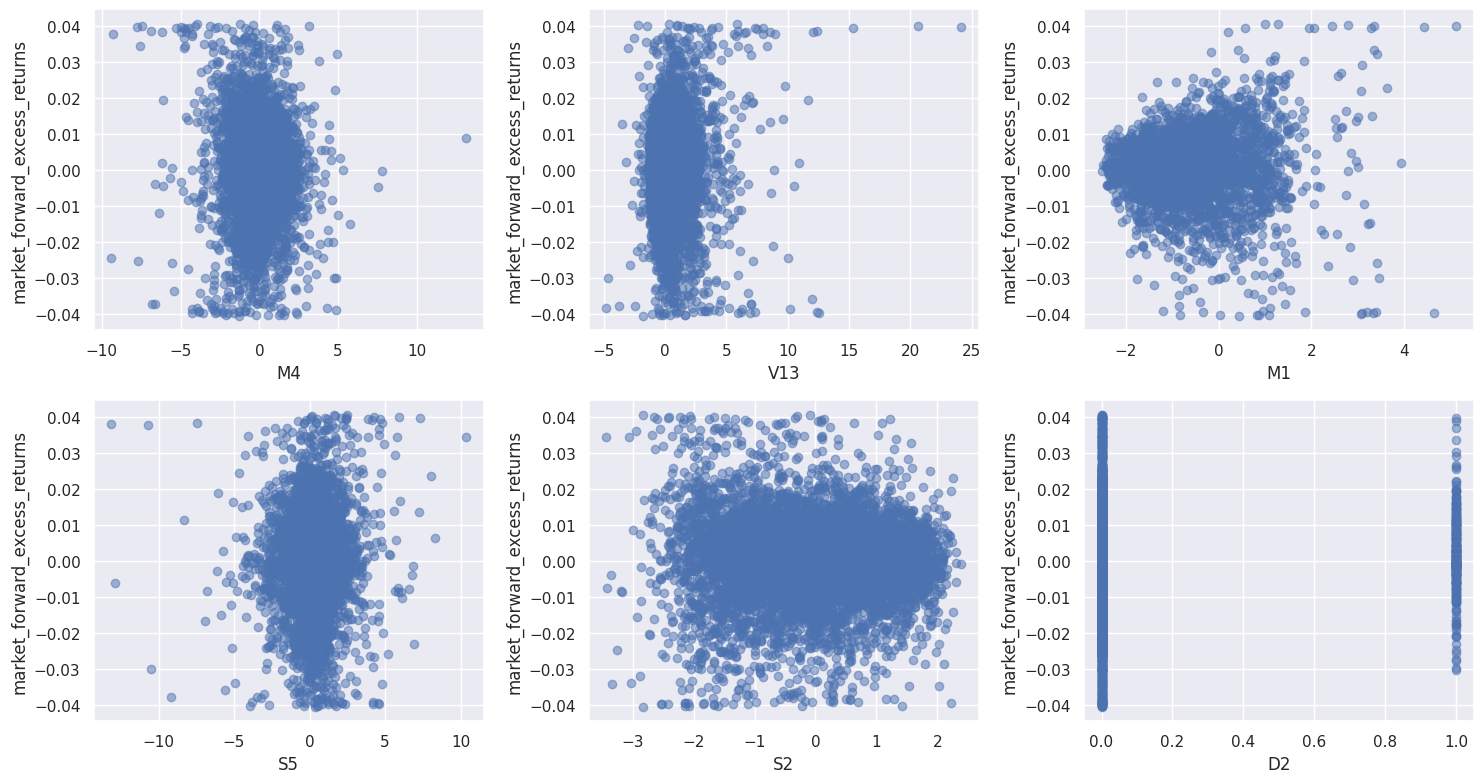

In [47]:
features = ['M4', 'V13', 'M1', 'S5', 'S2', 'D2']  
target = 'market_forward_excess_returns'

n = len(features)
cols = 3  
rows = (n + cols - 1) // cols 

fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))
axes = axes.flatten() 

for i, feature in enumerate(features):
    axes[i].scatter(train[feature], train[target], alpha=0.5)
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel(target, fontsize=12)
    axes[i].grid(True)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()